In [1]:
import pandas as pd
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [2]:
df.shape

(34857, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
num_col = df.dtypes[df.dtypes!='object'].index.values
cat_col = df.dtypes[df.dtypes=='object'].index.values
cat_col

array(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date',
       'CouncilArea', 'Regionname'], dtype=object)

In [6]:
df[cat_col].nunique()

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

In [8]:
for col in cat_col:
    if df[col].nunique() >50:
        df = df.drop(col,axis=1)

#res['Price'] = df['Price'] # Keeping Price coz its dependent variable

In [9]:
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,NaN,SS,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,3,u,NaN,VB,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [10]:
df.shape

(34857, 17)

In [11]:
df.nunique()

Rooms               12
Type                 3
Price             2871
Method               9
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [12]:
# Rooms and Bedroom2 columns are repeated columns(almost similar)
a = df[['Rooms','Bedroom2']].dropna()
(a['Rooms']==a['Bedroom2']).value_counts()
# Less than 948 missing values(less than 3%)
# So drop Bedroom2 column

True     25692
False      948
dtype: int64

In [13]:
948/25692*100

3.68986454927604

In [14]:
#Drop Bedroom2, Latitude and Longitude
df = df.drop(columns=['Bedroom2','Lattitude',	'Longtitude','Postcode'])
df.head()

,Rooms,Type,Price,Method,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
0,2,h,NaN,SS,2.5,1.0,1.0,126.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,2,h,1480000.0,S,2.5,1.0,1.0,202.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,2.5,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0
3,3,u,NaN,VB,2.5,2.0,1.0,0.0,NaN,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,2.5,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,Northern Metropolitan,4019.0


In [15]:
# Filling the missing values 
col = ['Distance','Bathroom','Car','Propertycount']
df[col]=df[col].fillna(0)
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt'] = 2021-df['YearBuilt']
df = df.dropna() # Removing the Null values from price Column

In [16]:
df2 = df.copy().select_dtypes(exclude=['object'])
df2.head(2)



,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,121.0,4019.0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,121.0,4019.0


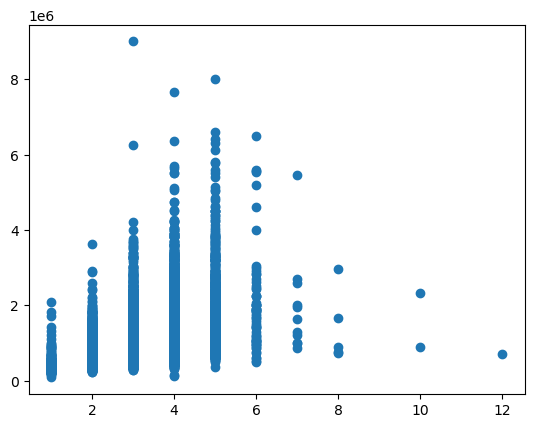

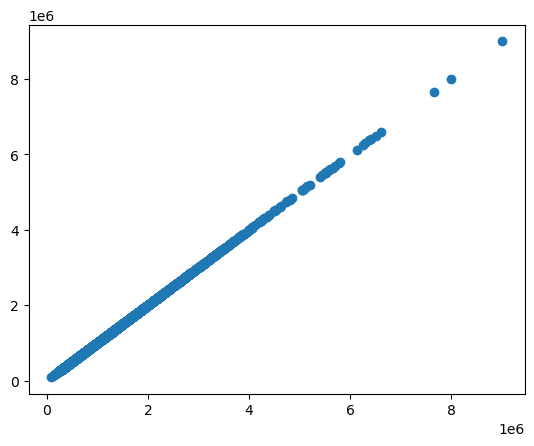

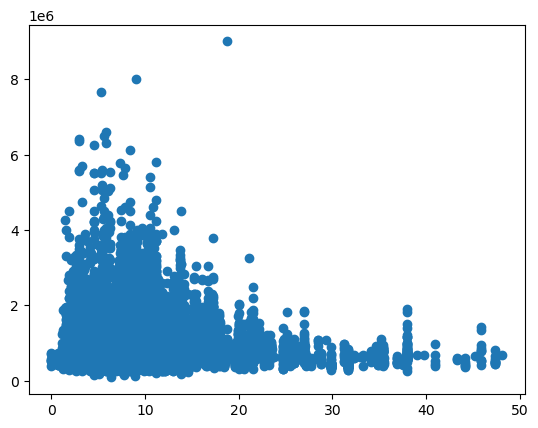

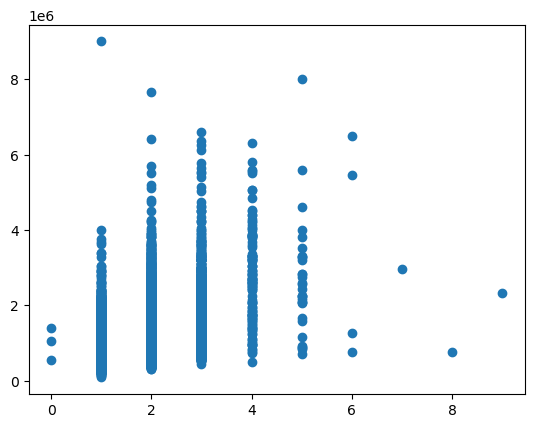

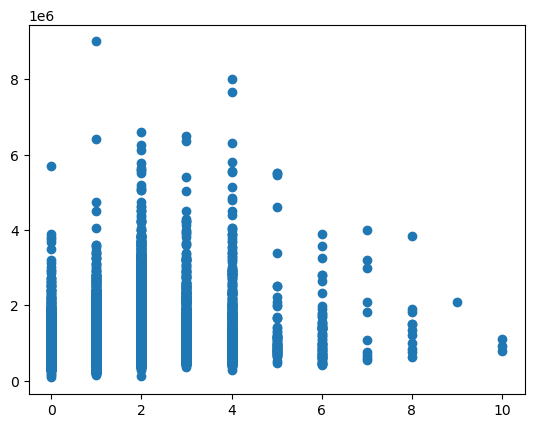

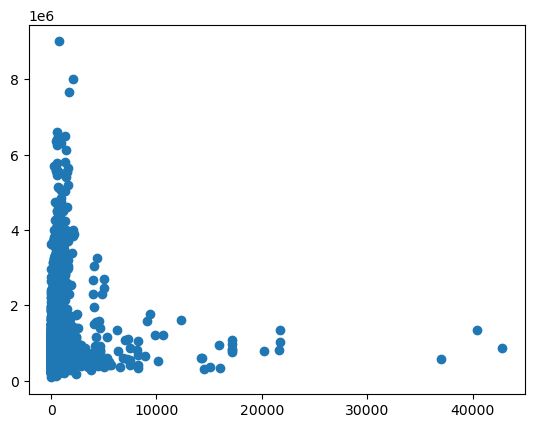

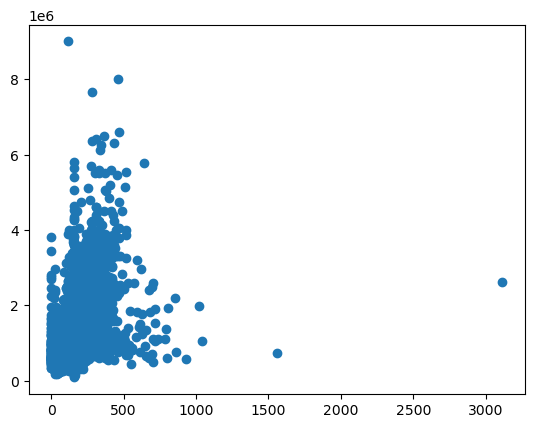

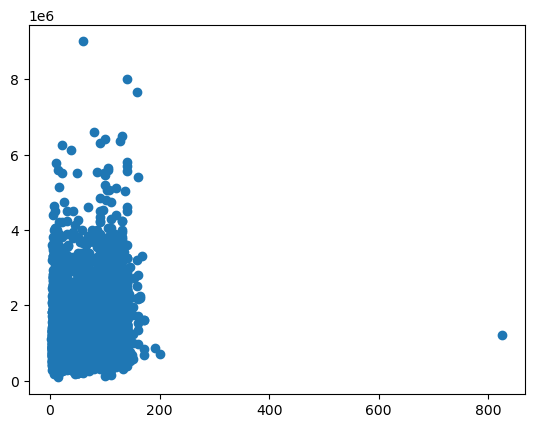

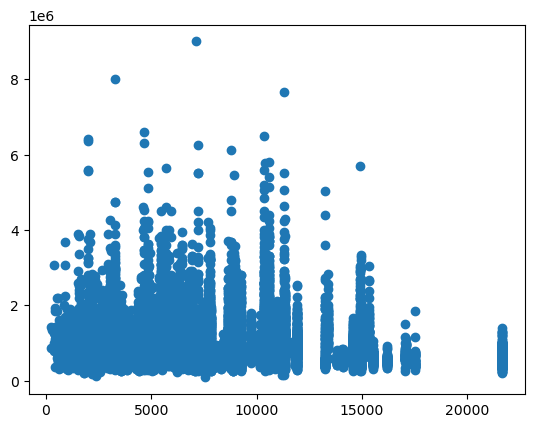

In [18]:
import matplotlib.pyplot as plt
for i in df2.columns:
    plt.scatter(df[i],df['Price'])
    plt.show()

In [19]:
# Taking only numerical columns
df2 = df.copy().select_dtypes(exclude='object')
# Taking input and output
x = df2.drop('Price',axis=1)
y = df2['Price']
# Splitting of data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test,squared=False))

0.5410651622006695
0.5139740682023648
0.14869745658706268
454153.61629080604


In [20]:
df = pd.get_dummies(df,drop_first=True)
df

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Type_t,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,121.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,121.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,1.0,2.0,120.0,142.0,7.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,2.0,0.0,245.0,210.0,111.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,1.0,2.0,256.0,107.0,131.0,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,25.5,2.0,2.0,383.0,118.0,5.0,2940.0,0,...,0,0,0,0,1,0,0,0,0,0
34849,3,570000.0,25.5,2.0,2.0,404.0,158.0,9.0,2940.0,0,...,0,0,0,0,1,0,0,0,0,0
34853,2,888000.0,6.3,2.0,1.0,98.0,104.0,3.0,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,1.0,2.0,220.0,120.0,21.0,6543.0,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Taking input and output
x = df.drop('Price',axis=1)
y = df['Price']

In [22]:
# Splitting of data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test,squared=False))

0.6811795639394685
0.6703889225117767
0.5299150846222644
374002.02648861066


In [25]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from xgboost import XGBRegressor

# Defining Regressor
model = XGBRegressor()
# Fitting Model
model.fit(x_train, y_train, verbose=False)
y_pred = model.predict(x_test)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test,squared=False))

0.9614926969459093
0.8128860292441484
0.7818424541884206
281790.38047588273


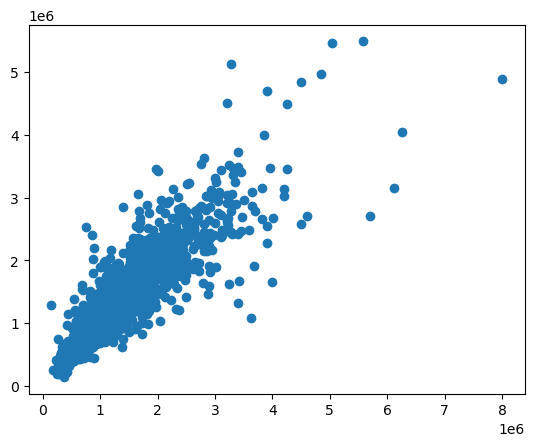

In [27]:
# Actual v predictions scatter
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


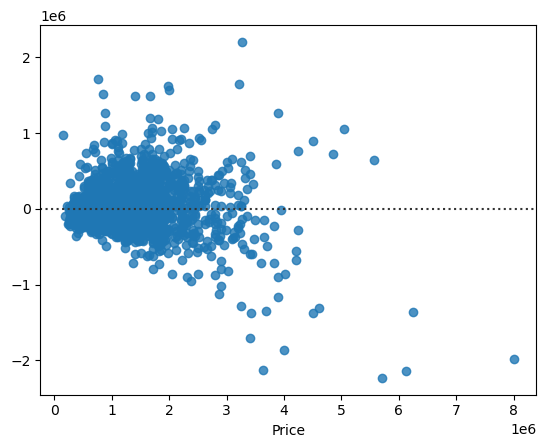

In [28]:
import seaborn as sns
sns.residplot(y_test,y_pred)
  
# show the plot
plt.show()